In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Buscaremos información en los datos para diseñar estrategias que impulsen el crecimiento y la retención de aplicaciones móviles.

1.  apps.csv: contains all the details of the applications on Google Play. There are 13 features that describe a given app.
2.  user_reviews.csv: contains 100 reviews for each app, most helpful first. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.

In [2]:
apps = pd.read_csv('datasets/apps.csv', index_col=0)
print(apps.shape)
apps.head(2)

(9659, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [3]:
apps['App'].duplicated().sum() # Para revisar si hay apps duplicadas en el dataframe

# En caso de haber duplicados o incluso para trabajar con una base de datos limpia eliminamos los duplicaods
#
# Drop duplicates from apps_with_duplicates
apps = apps.drop_duplicates()

# Print the total number of apps
print('Total number of apps in the dataset = ', apps['App'].count())

# Have a look at a random sample of 5 rows
apps.head(2)

Total number of apps in the dataset =  9659


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


A primera vista vemos que los valores en apps["Installs"] traen un '+' al final del número y ','. Parte de limpiar datos es eliminar estos caracteres. Revisemos si en el resto los datos son coherentes. Raiting, Reviews, Si, Installs y Price tienen que ser tipo float o int.

In [4]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            8432 non-null   float64
 5   Installs        9659 non-null   object 
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.0+ MB


Efectivamente "Installs" es tipo object, y adicional vemos que "Price" también es tipo object, si

In [5]:
l = []
for value in apps.Price:
    if value.isdigit()==False:
        l.append(value)
l[:5]

['$4.99', '$4.99', '$3.99', '$3.99', '$6.99']

Ya sabemos que el otro caracter que tenemos que eliminar es $

In [6]:
# List of characters to remove
chars_to_remove = ['+', ',', '$']
# List of column names to clean
cols_to_clean = ['Installs', 'Price']

# Loop for each column in cols_to_clean
for col in cols_to_clean:
    # Loop for each char in chars_to_remove
    for char in chars_to_remove:
        # Replace the character with an empty string
        apps[col] = apps[col].apply(lambda x: x.replace(char, ''))
        
apps = apps.astype({'Installs':float})
apps = apps.astype({'Price':float})
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            8432 non-null   float64
 5   Installs        9659 non-null   float64
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 1.0+ MB


Ya esta limpia la tabla de datos. Ahora exploremos las apps. Google play categoriza las apps y con los datos que tenemos podemos ver cuál tiene mayor puntaje, cuál se ha instalado más instalaciones (app dominante), cuáles son las categorías con menos apps...

Hay una forma de imprimir plots en el notebook y que podamos "jugar con la gráfica" con [Plotly](https://www.tutorialspoint.com/plotly/plotly_plotting_inline_with_jupyter_notebook.htm)

In [7]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Print the total number of unique categories
num_categories = len(list(apps['Category'].unique()))
print('Number of categories = ', num_categories)

# Count the number of apps in each 'Category'. 
num_apps_in_category = apps['Category'].value_counts()

# Sort num_apps_in_category in descending order based on the count of apps in each category
sorted_num_apps_in_category = num_apps_in_category.sort_values(ascending= False)

data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

plotly.offline.iplot(data)

Number of categories =  33


In [8]:
family = apps[apps.Category=="FAMILY"]
family.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2017,Jewels Crush- Match 3 Puzzle,FAMILY,4.4,14774,19.0,1000000.0,Free,0.0,Everyone,Casual;Brain Games,"July 23, 2018",1.9.3901,4.0.3 and up
2018,Coloring & Learn,FAMILY,4.4,12753,51.0,5000000.0,Free,0.0,Everyone,Educational;Creativity,"July 17, 2018",1.49,4.0.3 and up
2019,Mahjong,FAMILY,4.5,33983,22.0,5000000.0,Free,0.0,Everyone,Puzzle;Brain Games,"August 2, 2018",1.24.3181,4.0.3 and up
2020,Super ABC! Learning games for kids! Preschool ...,FAMILY,4.6,20267,46.0,1000000.0,Free,0.0,Everyone,Educational;Education,"July 16, 2018",1.1.6.7,4.1 and up
2021,Toy Pop Cubes,FAMILY,4.5,5761,21.0,1000000.0,Free,0.0,Everyone,Casual;Brain Games,"July 4, 2018",1.8.3181,4.0.3 and up


Por los nombres vemos que la categoría familia son apps que cualquier persona podría tener en su celular sobre todo si es madre o padre. Es la categoría que más apps tiene. Veamos su distribución por rating.

In [9]:
# Average rating of apps
avg_family_rating = family['Rating'].mean()
print('Average app rating = ', avg_family_rating)

# Distribution of apps according to their ratings
data = [go.Histogram(
        x = family['Rating'],
)]

# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_family_rating,
              'y0': 0,
              'x1': avg_family_rating,
              'y1': 200,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

Average app rating =  4.179664179104478


Ahora veamos esa gráfica para las 5 primeras categorías con más apps

In [10]:
sorted_num_apps_in_category[:5]

FAMILY      1832
GAME         959
TOOLS        827
BUSINESS     420
MEDICAL      395
Name: Category, dtype: int64

Average app rating =  4.173243045387998


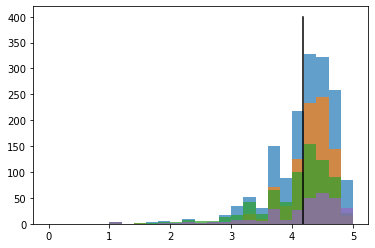

In [11]:
# Average rating of apps
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

plt.hist(apps[apps.Category=="FAMILY"]['Rating'], bins = 20, alpha = 0.7)
plt.hist(apps[apps.Category=="GAME"]['Rating'], bins = 20, alpha = 0.7)
plt.hist(apps[apps.Category=="TOOLS"]['Rating'], bins = 20, alpha = 0.7)
plt.hist(apps[apps.Category=="BUSSINESS"]['Rating'], bins = 20, alpha = 0.7)
plt.hist(apps[apps.Category=="MEDICAL"]['Rating'], bins = 20, alpha = 0.7)
plt.plot([avg_app_rating,avg_app_rating], [0,400], color = 'black')

plt.show()

Podemos ver que estas categorías tienen muy buen puntaje. La estadística le ayuda.

Ahora veamos si el tamaño de la app afecta este puntaje, o el precio. Y si los usuarios prefieren apps gratis a pagas.

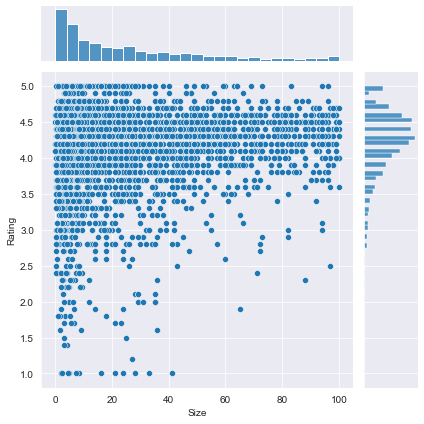

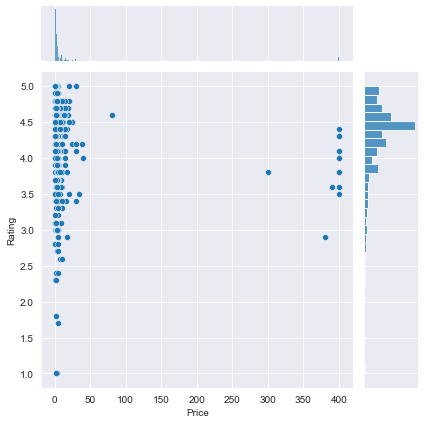

In [12]:
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# Select rows where both 'Rating' and 'Size' values are present (ie. the two values are not null)
apps_rating_present = apps[apps['Rating'].isnull()==False]
apps_with_size_and_rating_present = apps_rating_present[apps_rating_present['Size'].isnull()==False]

# Subset for categories with at least 250 apps
large_categories = apps_with_size_and_rating_present.groupby('Category').filter(lambda x: len(x) >= 250)

# Plot size vs. rating
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'])

# Select apps whose 'Type' is 'Paid'
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type']=='Paid']

# Plot price vs. rating
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])

Text(0.5, 1.0, 'App pricing trend across categories')

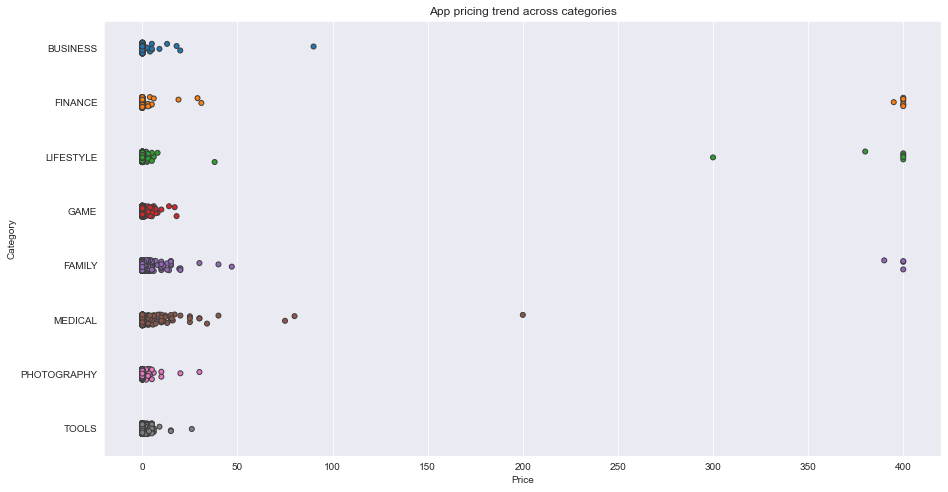

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')


In [14]:
# Apps whose Price is greater than 200
apps_above_200 = popular_app_cats[popular_app_cats['Price']>200]
apps_above_200[['Category', 'App', 'Price']]

,Category,App,Price
4197,FAMILY,most expensive app (H),399.99
4362,LIFESTYLE,💎 I'm rich,399.99
4367,LIFESTYLE,I'm Rich - Trump Edition,400.00
5351,LIFESTYLE,I am rich,399.99
5354,FAMILY,I am Rich Plus,399.99
5355,LIFESTYLE,I am rich VIP,299.99
5356,FINANCE,I Am Rich Premium,399.99
5357,LIFESTYLE,I am extremely Rich,379.99
5358,FINANCE,I am Rich!,399.99
5359,FINANCE,I am rich(premium),399.99
